In [1]:
import numpy as np 
from numpy import * 

x = np.array([-0.5, 0.,0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4.  , 4.5, 5.])
y = np.array([ 1.1,-1, 0.5, 0.2, 1.2, 0.7, 1.0, 2.8, 2.5, 3.0 , 4.5, 3.0])
print (x)
print (y)

import pandas as pd
data = pd.DataFrame()
data['x'] = x
data['y'] = y

[-0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5. ]
[ 1.1 -1.   0.5  0.2  1.2  0.7  1.   2.8  2.5  3.   4.5  3. ]


Построим график полученной прямой и укажем на нем точки.

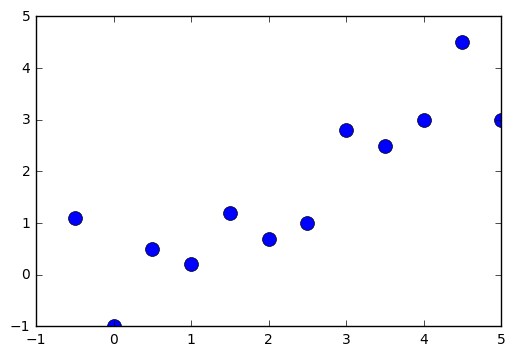

In [2]:
import matplotlib.pyplot as plt 

plt.plot(x, y, 'o', markersize=10)
#plt.legend() 
plt.show()

Вычислим коэффициэнты прямой по МНК пользуясь второй формулой:

$
\left\{
\begin{array}{ll}
a &= \frac{\sum _{i=1}^{n}(x_i - \overline{x})(y_i - \overline{y})}{\sum _{i=1}^{n}(x_i -\overline{x})^2}\\
b &= \overline{y} - a \cdot \overline{x}\\
\end{array}
\Leftrightarrow
\right.
\left\{
\begin{array}{ll}
a &= \frac{n\cdot \sum _{i=1}^{n}x_i y_i - \sum _{i=1}^{n}x_i \cdot \sum _{i=1}^{n}y_i} {n\cdot\sum _{i=1}^{n}x_i^2 -  (\sum _{i=1}^{n}x_i)^2}\\
b &= \overline{y} - a \cdot \overline{x}\\
\end{array}
\right.
\Leftrightarrow
\left\{
\begin{array}{ll}
a &= \frac{\sum _{i=1}^{n}x_i y_i - \frac{\sum _{i=1}^{n}x_i \sum _{i=1}^{n}y_i}{n}} {\sum _{i=1}^{n}x_i^2 -  \frac{(\sum _{i=1}^{n}x_i)^2}{n}}\\
b &= \overline{y} - a \cdot \overline{x}\\
\end{array}
\right.
$

приготовим дополнительные данные:

In [3]:
data['xy'] = data['x']*data['y']
data['xx'] = data['x']*data['x']
print (data.shape[0])
print data

12
      x    y     xy     xx
0  -0.5  1.1  -0.55   0.25
1   0.0 -1.0  -0.00   0.00
2   0.5  0.5   0.25   0.25
3   1.0  0.2   0.20   1.00
4   1.5  1.2   1.80   2.25
5   2.0  0.7   1.40   4.00
6   2.5  1.0   2.50   6.25
7   3.0  2.8   8.40   9.00
8   3.5  2.5   8.75  12.25
9   4.0  3.0  12.00  16.00
10  4.5  4.5  20.25  20.25
11  5.0  3.0  15.00  25.00


In [4]:
a_chislitel = data.shape[0]*sum(data['xy']) - sum(data['x'])*sum(data['y'])
a_znam = data.shape[0]*sum(data['xx']) - sum(data['x'])*sum(data['x'])
a = a_chislitel / a_znam

b = sum(data['y'])/data.shape[0] - a*sum(data['x'])/data.shape[0]
print (a,b)

(0.7307692307692307, -0.019230769230769162)


Рисуем прямую

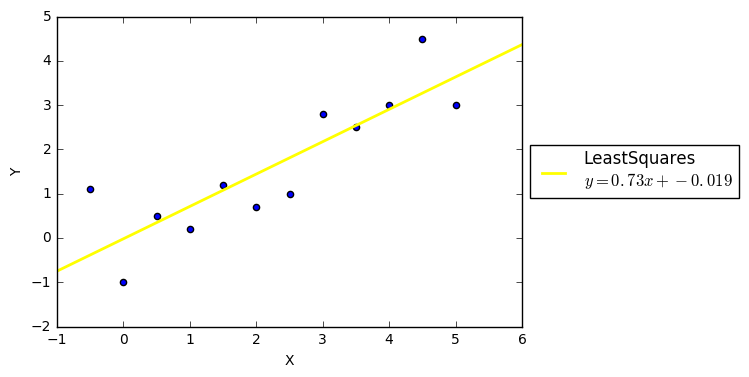

In [5]:
# метод plot из matplotlib.pyplot
import matplotlib.pyplot as plt
%matplotlib inline

ax = data.plot(kind = 'scatter', x = 'x', y = 'y')
ax.set(xlabel = u'X', ylabel = u'Y')
plt.xlim(-1, 6)

# метод linspace библиотеки NumPy
x_plot = np.linspace(-1, 6, 10)

y_LeastSquares = map(lambda x: a*x + b, x_plot)
Label_string = 'LeastSquares\n$y = {:.2f}x + {:.3f}$'.format(a,b)
plt.plot(x_plot, y_LeastSquares, color = "yellow", lw = 2, label=Label_string)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# scipy.optimize.minimize
Теперь подбираем эти коэффициенты с помощью: __scipy.optimize.minimize__

In [6]:
from scipy import optimize
def sum_Error(w0, w1, data):
    err = 0.0
    y = data['x']
    x = data['y']
    for i in range(1, len(data)):
        err += (y[i]-(w0 + w1 * x[i])) ** 2
    return err

def Least_squares(w0, w1, X, Y):
    return sum(map(lambda xi,yi: (yi - (w0+w1*xi))**2, X,Y))

def optim_Least_squares(W,DateArray):
    return Least_squares(W[0], W[1], DateArray['x'], DateArray['y'])

w0_optimize, w1_optimize = optimize.minimize(optim_Least_squares, \
                                             (0,0), \
                                             args = data, \
                                             bounds = [(-10, 10), (-10, 10)], \
                                             method = 'L-BFGS-B').x
print w0_optimize
print w1_optimize

-0.019230734335
0.730769217029


Добавляем к графику найденную прямую

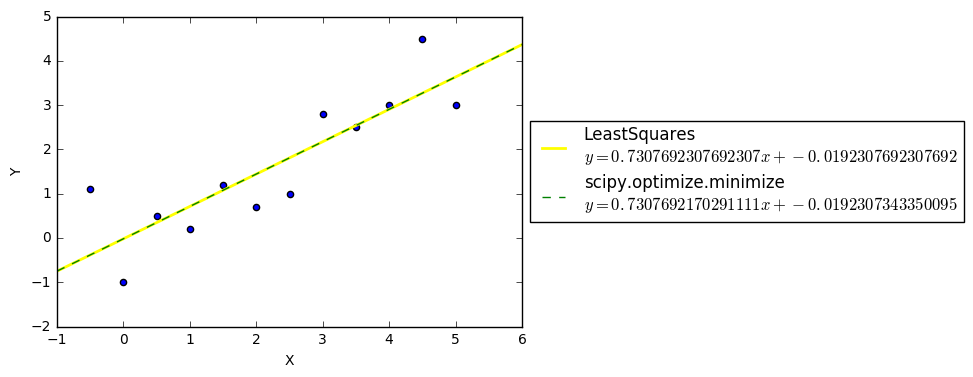

In [12]:
ax = data.plot(kind = 'scatter', x = 'x', y = 'y')
ax.set(xlabel = u'X', ylabel = u'Y')
plt.xlim(-1, 6)

# метод linspace библиотеки NumPy
x_plot = np.linspace(-1, 6, 10)

y_LeastSquares = map(lambda x: a*x + b, x_plot)
#Label_string = 'LeastSquares\n$y = {:.2f}x + {:.3f}$'.format(a,b)
Label_string = 'LeastSquares\n$y = {:.16f}x + {:.16f}$'.format(a,b)
plt.plot(x_plot, y_LeastSquares, color = "yellow", lw = 2, label=Label_string)

y_optimize_minimize = map(lambda x: w1_optimize*x + w0_optimize, x_plot)
Label_string = 'scipy.optimize.minimize\n$y = {:.16f}x + {:.16f}$'.format(w1_optimize,w0_optimize)
plt.plot(x_plot, y_optimize_minimize, '--', color = "green", lw = 1, label=Label_string)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# numpy.linalg.lstsq
Теперь подбираем эти коэффициенты с помощью:
__numpy.linalg.lstsq__

Перепишем линейное уравнение $y = mx + c$ как $y = Ap$, где $A = [[ x 1 ]]$ и $p = [[m], [c]]$ Построим $А$ по $х$ : 

In [8]:
A = np.vstack([x, np.ones(len(x))]).T 
A

array([[-0.5,  1. ],
       [ 0. ,  1. ],
       [ 0.5,  1. ],
       [ 1. ,  1. ],
       [ 1.5,  1. ],
       [ 2. ,  1. ],
       [ 2.5,  1. ],
       [ 3. ,  1. ],
       [ 3.5,  1. ],
       [ 4. ,  1. ],
       [ 4.5,  1. ],
       [ 5. ,  1. ]])

Используем __lstsq__ для решения его относительно вектора $p$. 

In [9]:
 m, c = np.linalg.lstsq(A, y)[0]
 print m, c

0.730769230769 -0.0192307692308


Добавляем к предыдущему графику новый результат

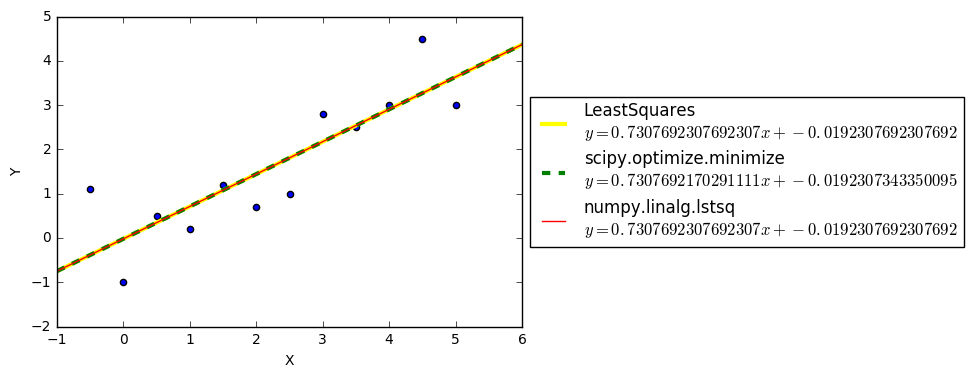

In [16]:
ax = data.plot(kind = 'scatter', x = 'x', y = 'y')
ax.set(xlabel = u'X', ylabel = u'Y')
plt.xlim(-1, 6)

# метод linspace библиотеки NumPy
x_plot = np.linspace(-1, 6, 10)

y_LeastSquares = map(lambda x: a*x + b, x_plot)
#Label_string = 'LeastSquares\n$y = {:.2f}x + {:.3f}$'.format(a,b)
Label_string = 'LeastSquares\n$y = {:.16f}x + {:.16f}$'.format(a,b)
plt.plot(x_plot, y_LeastSquares, color = "yellow", lw = 3, label=Label_string)

y_optimize_minimize = map(lambda x: w1_optimize*x + w0_optimize, x_plot)
Label_string = 'scipy.optimize.minimize\n$y = {:.16f}x + {:.16f}$'.format(w1_optimize,w0_optimize)
plt.plot(x_plot, y_optimize_minimize, '--', color = "green", lw = 3, label=Label_string)

y_numpy_linalg_lstsq = map(lambda x: m*x + c, x_plot)
Label_string = 'numpy.linalg.lstsq\n$y = {:.16f}x + {:.16f}$'.format(m,c)
plt.plot(x_plot, y_LeastSquares, color = "red", lw = 1, label=Label_string)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))